# June 13 - Periodicity Analysis Contd.

## Tested the batch sizes near the start of the epochs to see if there exists a pattern but did not find anything.

## Experiment 3 : Visualizing the optimizer state and parameters w.r.t. to the iterations

In [8]:
# Quick test of torch optimizers
import torch
import numpy as np

# Initialize an empty tensor
a = torch.zeros(4,4)
print(a)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [9]:
# Initialize a new optimizer
adam = torch.optim.Adam(iter(a))

In [10]:
print(adam.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}


In [11]:
state_dict_list = []
for i in range(10):
    state_dict_list.append(adam.state_dict())

In [12]:
sd_np = np.array(state_dict_list)

In [13]:
print(sd_np)

[{'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}
 {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}
 {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}
 {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}
 {'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 1403693993

## Modified the code in the engine.py to save the state_dict as well

In [14]:
# Python library and module imports
import os
import sys
import matplotlib.pyplot as plt
import math
import h5py
from matplotlib.colors import LogNorm
import pandas as pd
import random

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

## Pre-test using 1000 samples

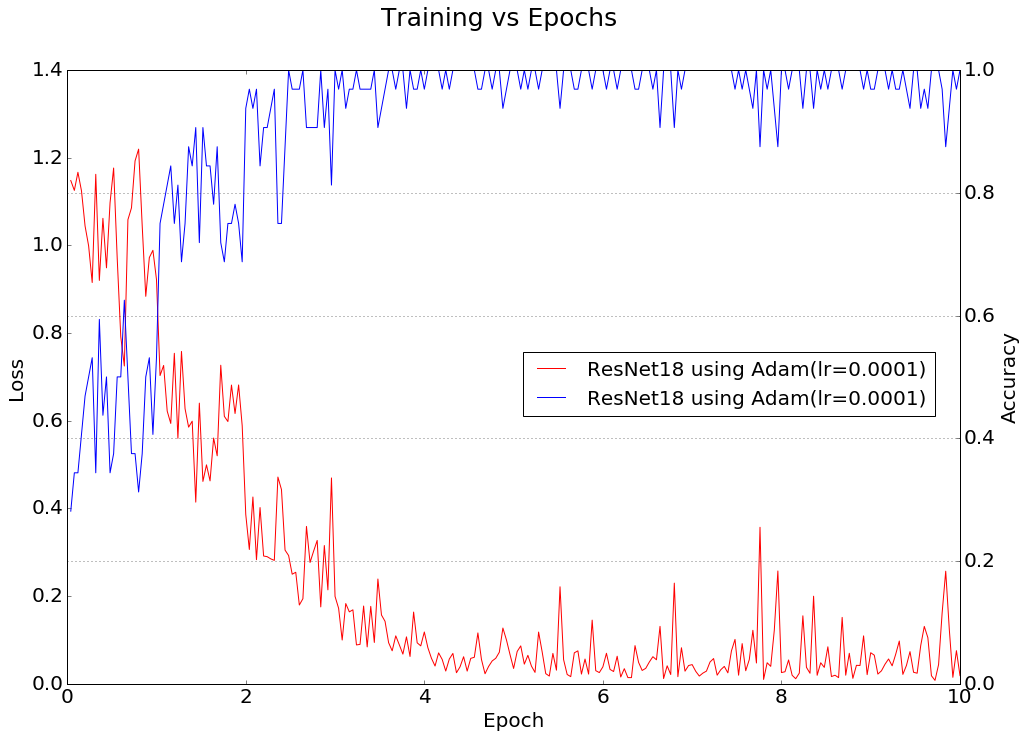

In [15]:
# Setup the paths to the log files

log = "20190613_194206"

# Training log files for the models
log_dir =  "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/"
train_log = log_dir + log + "/log_train.csv"
plot_utils.plot_training([train_log],
                              ["ResNet18 using Adam(lr=0.0001)"],
                              {"ResNet18 using Adam(lr=0.0001)":["red","blue"]},
                              downsample_interval=None, legend_loc=(0.82, 0.5))

In [16]:
# Load the np array for the state_dict
state_dict_list = np.load(log_dir + log + "/optim_state_array.npy")
print(state_dict_list.shape)

(250,)


In [20]:
print(state_dict_list[0])

{'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}


In [24]:
print(state_dict_list[9])

{'state': {}, 'param_groups': [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [140369399366280, 140369399366640, 140369399366784, 140369399366856]}]}


### For the smaller dataset, the parameters does not seem to change

## Test using 50000 samples

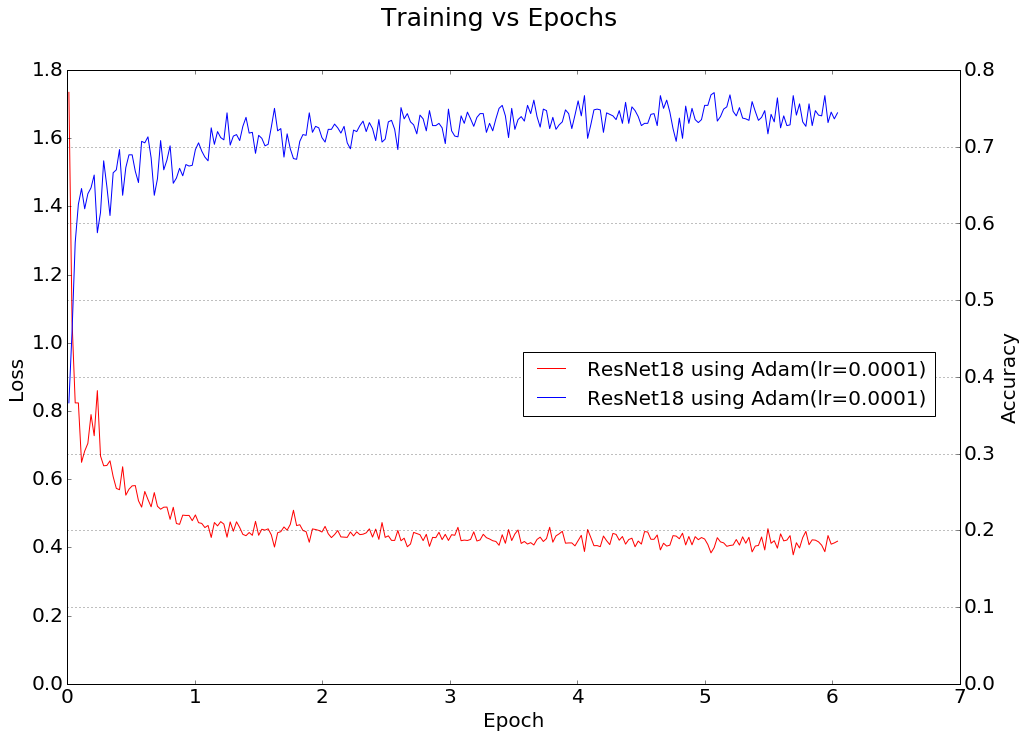

In [62]:
# Setup the paths to the log files

log = "20190613_213625"

# Training log files for the models
log_dir =  "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/"
train_log = log_dir + log + "/log_train.csv"
plot_utils.plot_training([train_log],
                              ["ResNet18 using Adam(lr=0.0001)"],
                              {"ResNet18 using Adam(lr=0.0001)":["red","blue"]},
                              downsample_interval=32, legend_loc=(0.82, 0.5))

In [28]:
# Load the np array for the state_dict
state_dict_list = np.load(log_dir + log + "/optim_state_array.npy")
print(state_dict_list.shape)
print(len(state_dict_list))

(12500,)
12500


In [30]:
print(state_dict_list[0].keys())
print(state_dict_list[len(state_dict_list)-1].keys())

dict_keys(['state', 'param_groups'])
dict_keys(['state', 'param_groups'])


In [32]:
print(state_dict_list[0]['state'].keys())

dict_keys([139959786609472, 139959239568048, 139959786609040, 139959786607600, 139959786607672, 139959786607384, 139959786608608, 139959786608752, 139959786608392, 139959786609400, 139959786609256, 139959786609760, 139959786610048, 139959786609976, 139959786610192, 139959227199776, 139959227199704, 139959227199920, 139959227200208, 139959227200136, 139959227200352, 139959786610480, 139959786610408, 139959786610624, 139959227200640, 139959227200568, 139959227200784, 139959227201072, 139959227201000, 139959227201216, 139959227201936, 139959227201864, 139959227202080, 139959227202368, 139959227202296, 139959227202512, 139959227201504, 139959227201432, 139959227201648, 139959227202800, 139959227202728, 139959227202944, 139959227203232, 139959227203160, 139959227203376, 139959227281984, 139959227281912, 139959227282128, 139959227282416, 139959227282344, 139959227282560, 139959227281552, 139959227281480, 139959227281696, 139959227282848, 139959227282776, 139959227282992, 139959227283280, 139

In [34]:
print(state_dict_list[0]['param_groups'])

[{'lr': 0.0001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [139959786609472, 139959239568048, 139959786609040, 139959786607600, 139959786607672, 139959786607384, 139959786608608, 139959786608752, 139959786608392, 139959786609400, 139959786609256, 139959786609760, 139959786610048, 139959786609976, 139959786610192, 139959227199776, 139959227199704, 139959227199920, 139959227200208, 139959227200136, 139959227200352, 139959786610480, 139959786610408, 139959786610624, 139959227200640, 139959227200568, 139959227200784, 139959227201072, 139959227201000, 139959227201216, 139959227201936, 139959227201864, 139959227202080, 139959227202368, 139959227202296, 139959227202512, 139959227201504, 139959227201432, 139959227201648, 139959227202800, 139959227202728, 139959227202944, 139959227203232, 139959227203160, 139959227203376, 139959227281984, 139959227281912, 139959227282128, 139959227282416, 139959227282344, 139959227282560, 139959227281552, 139959227281480

In [46]:
print(state_dict_list[0]['state'][139959786609472].keys())

dict_keys(['step', 'exp_avg', 'exp_avg_sq'])


In [52]:
state_key = 139959786609472
print(state_dict_list[0]['state'][state_key]['step'])
print(state_dict_list[0]['state'][state_key]['exp_avg'].size())
print(state_dict_list[0]['state'][state_key]['exp_avg_sq'].size())

12500
torch.Size([64, 38, 7, 7])
torch.Size([64, 38, 7, 7])


In [53]:
state_key = 139959239568048
print(state_dict_list[0]['state'][state_key]['step'])
print(state_dict_list[0]['state'][state_key]['exp_avg'].size())
print(state_dict_list[0]['state'][state_key]['exp_avg_sq'].size())

12500
torch.Size([64])
torch.Size([64])


In [54]:
state_key = 139959786609040
print(state_dict_list[0]['state'][state_key]['step'])
print(state_dict_list[0]['state'][state_key]['exp_avg'].size())
print(state_dict_list[0]['state'][state_key]['exp_avg_sq'].size())

12500
torch.Size([64])
torch.Size([64])


In [55]:
state_key = 139959786607600
print(state_dict_list[0]['state'][state_key]['step'])
print(state_dict_list[0]['state'][state_key]['exp_avg'].size())
print(state_dict_list[0]['state'][state_key]['exp_avg_sq'].size())

12500
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])


In [56]:
# Print the sizes of the tensors
for key in state_dict_list[0]['state'].keys():
    print("param keys = {0}".format(key))
    print(state_dict_list[0]['state'][key]['exp_avg'].size())
    print(state_dict_list[0]['state'][key]['exp_avg_sq'].size())

param keys = 139959786609472
torch.Size([64, 38, 7, 7])
torch.Size([64, 38, 7, 7])
param keys = 139959239568048
torch.Size([64])
torch.Size([64])
param keys = 139959786609040
torch.Size([64])
torch.Size([64])
param keys = 139959786607600
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
param keys = 139959786607672
torch.Size([64])
torch.Size([64])
param keys = 139959786607384
torch.Size([64])
torch.Size([64])
param keys = 139959786608608
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
param keys = 139959786608752
torch.Size([64])
torch.Size([64])
param keys = 139959786608392
torch.Size([64])
torch.Size([64])
param keys = 139959786609400
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
param keys = 139959786609256
torch.Size([64])
torch.Size([64])
param keys = 139959786609760
torch.Size([64])
torch.Size([64])
param keys = 139959786610048
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
param keys = 139959786609976
torch.Size([64])
torch.Size([64])
param keys = 13995

In [59]:
# Check to see if the lr changes anywhere in the iteration
for i in range(len(state_dict_list)):
    if state_dict_list[i]['param_groups'][0]['lr'] != 0.0001:
        print(state_dict_list[i]['param_groups'][0]['lr'])

### There are no iterations for which the batch size changes.

# Plot just one parameter from the state dict w.r.t the iterations

In [72]:
# Print the single value from the state_dict_list(tensor)
val = state_dict_list[0]['state'][state_dict_list[0]['state'].keys()[0]]['exp_avg'][0,0,3,3]
print(val.item())
val = state_dict_list[10]['state'][139959786609472]['exp_avg'][0,0,3,3]
print(val)
val = state_dict_list[100]['state'][139959786609472]['exp_avg'][0,0,3,3]
print(val)
val = state_dict_list[1000]['state'][139959786609472]['exp_avg'][0,0,3,3]
print(val)

TypeError: 'dict_keys' object does not support indexing

In [78]:
print(state_dict_list[0]['state'][list(state_dict_list[0]['state'].keys())[0]]['exp_avg'].size())

torch.Size([64, 38, 7, 7])


## Choosing the central point of the first kernel to plot

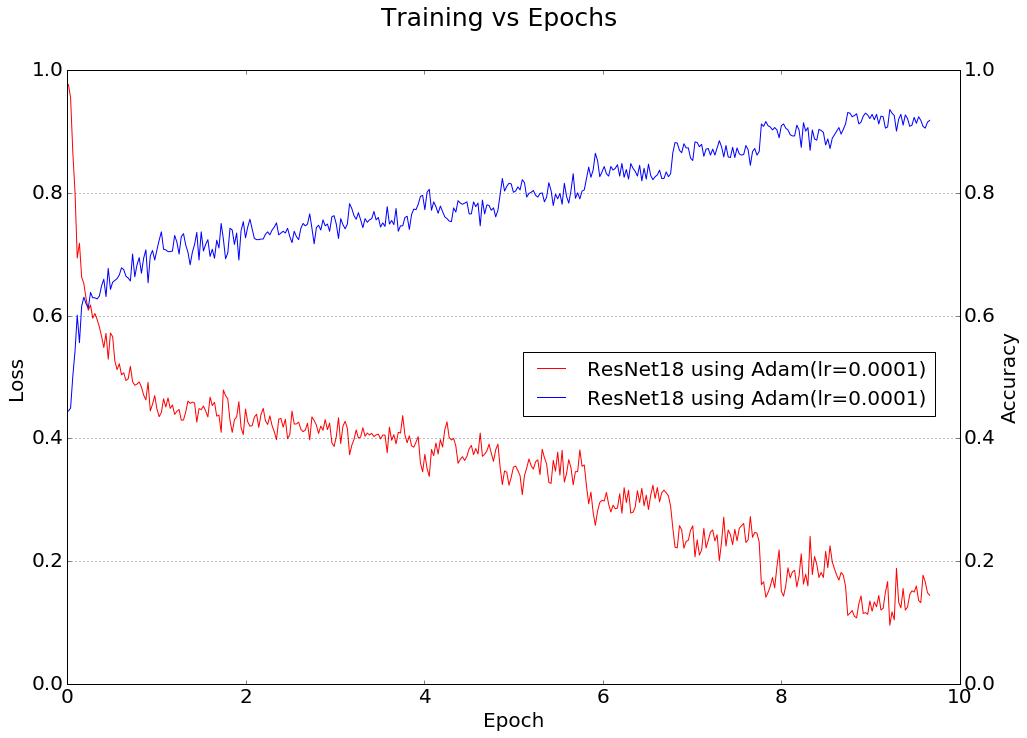

In [79]:
# Setup the paths to the log files

log = "20190613_225329"

# Training log files for the models
log_dir =  "/home/akajal/WatChMaL/WatChMaL-VAE/save_path/data_description/"
train_log = log_dir + log + "/log_train.csv"
plot_utils.plot_training([train_log],
                              ["ResNet18 using Adam(lr=0.0001)"],
                              {"ResNet18 using Adam(lr=0.0001)":["red","blue"]},
                              downsample_interval=32, legend_loc=(0.82, 0.5))

In [80]:
# Load the np array for the state_dict
state_dict_values = np.load(log_dir + log + "/optim_state_array.npy")
print(state_dict_values.shape)
print(len(state_dict_values))

(12500,)
12500


In [83]:
train_log_df = pd.read_csv(train_log)

Text(0, 0.5, 'exp_avg')

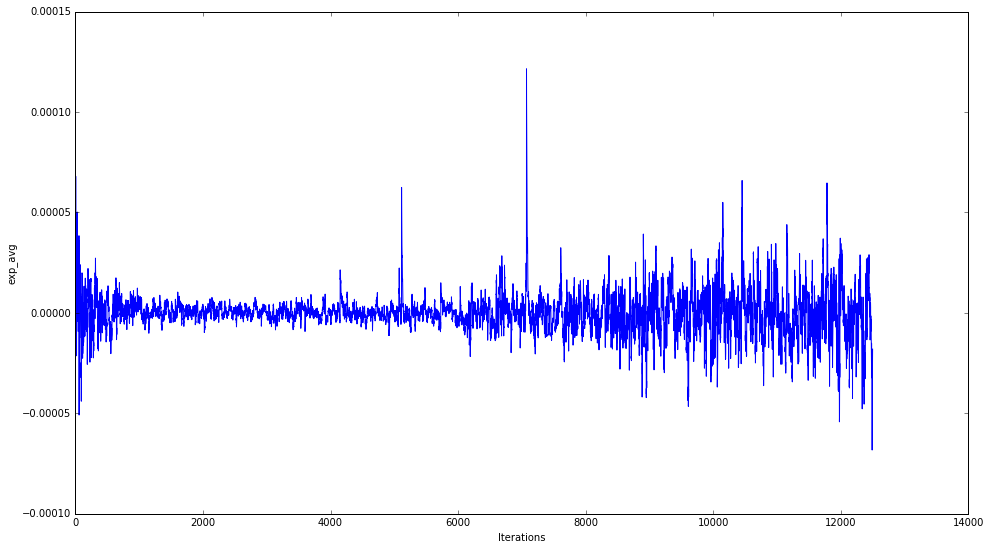

In [87]:
# Quick plot not considering the x-values to see the pattern
plt.figure(figsize=(16,9))
plt.plot(train_log_df['iteration'].values, state_dict_values)
plt.xlabel("Iterations")
plt.ylabel("exp_avg")

Text(0, 0.5, 'exp_avg')

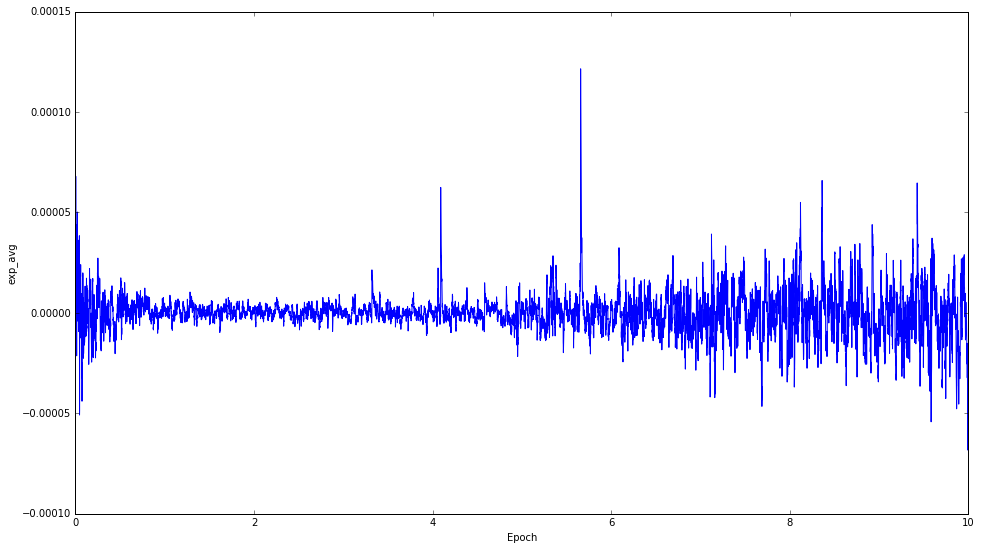

In [88]:
# Quick plot not considering the x-values to see the pattern
plt.figure(figsize=(16,9))
plt.plot(train_log_df['epoch'].values, state_dict_values)
plt.xlabel("Epoch")
plt.ylabel("exp_avg")